In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)

In [2]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Plot

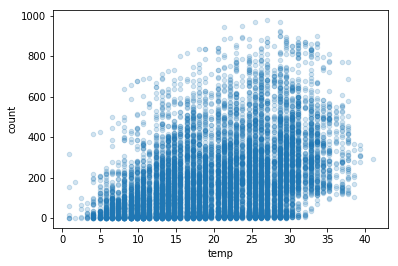

In [3]:
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2)

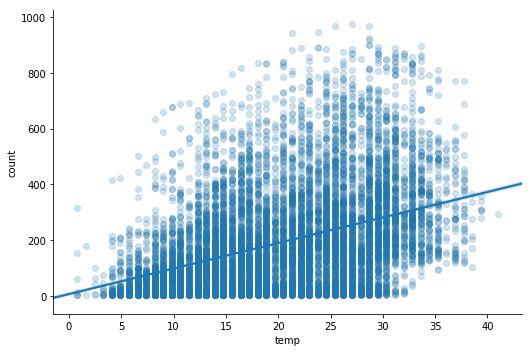

In [4]:
import seaborn as sns
sns.lmplot(x='temp', y='count', data=bikes, aspect=1.5, scatter_kws={'alpha': 0.2})

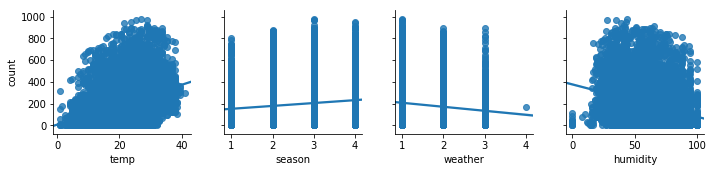

In [5]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', kind='reg')

In [6]:
bikes[['count', 'temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


### Linear Regression

In [7]:
feature_cols = ['temp']

X = bikes[feature_cols]
y = bikes['count']

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print(linreg.intercept_)
print(linreg.coef_)

6.0462129596163265
[9.17054048]


In [11]:
linreg.predict(20)

array([189.45702259])

In [12]:
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred))

166.44886243326746

In [13]:
average_bike_rental = bikes['count'].mean()

In [14]:
# Confronto con modello nullo
null_modello_previsioni = [average_bike_rental] * bikes.shape[0]
np.sqrt(metrics.mean_squared_error(y, null_modello_previsioni))

181.1361335742659

### Regressione Logistica

In [15]:
average_bike_rental = bikes['count'].mean()
bikes['above_average'] = bikes['count'] >= average_bike_rental

In [16]:
bikes['above_average'].value_counts(normalize=True)

False    0.599853
True     0.400147
Name: above_average, dtype: float64

In [17]:
feature_cols = ['temp']

X = bikes[feature_cols]
y = bikes['above_average']

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.6726671565025716

In [19]:
# Caratteristiche Ordinali

In [20]:
bikes['hour'] = bikes['datetime'].apply(lambda x:int(x[11]+x[12]))
bikes['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [21]:
def when_is_it(hour):
    if hour >= 5 and hour < 11:
        return "morning"
    if hour >= 11 and hour < 16:
        return "afternoon"
    if hour >= 16 and hour < 18:
        return "rush_hour"
    else:
        return "off_hours"

In [22]:
bikes['when_is_it'] = bikes['hour'].apply(when_is_it)
bikes[['when_is_it', 'above_average']].head()

,when_is_it,above_average
0,off_hours,False
1,off_hours,False
2,off_hours,False
3,off_hours,False
4,off_hours,False


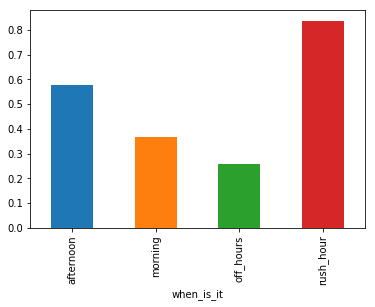

In [23]:
bikes.groupby('when_is_it').above_average.mean().plot(kind='bar')

In [24]:
when_dummies = pd.get_dummies(bikes['when_is_it'], prefix='when_')
when_dummies.head()

,when__afternoon,when__morning,when__off_hours,when__rush_hour
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [25]:
when_dummies = when_dummies.iloc[:, 1:]
when_dummies.head()

,when__morning,when__off_hours,when__rush_hour
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [26]:
new_bike = pd.concat([bikes[['temp', 'humidity']], when_dummies], axis=1)

In [27]:
X = new_bike
y = bikes.above_average

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.7523879500367376